In [38]:
!pip install pandas numpy
import pandas as pd
import numpy as np

In [39]:
# Carregando o Dataset
url = 'https://raw.githubusercontent.com/klaytoncastro/idp-machinelearning/refs/heads/main/california/california_housing.csv'
df = pd.read_csv(url)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [40]:
# Verificando a estrutura de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [41]:
# Calculando as correlações entre as variáveis ​​preditoras e a variável alvo
correlations = df.corr()['MedHouseVal'].sort_values(ascending=False)
print(correlations)

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


In [42]:
# Verificando a distribuição dos dados
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


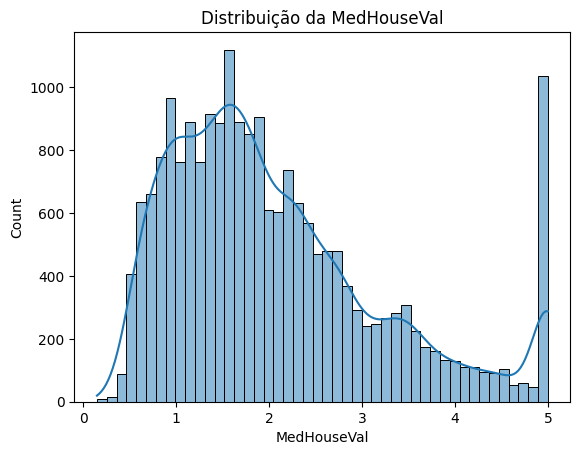

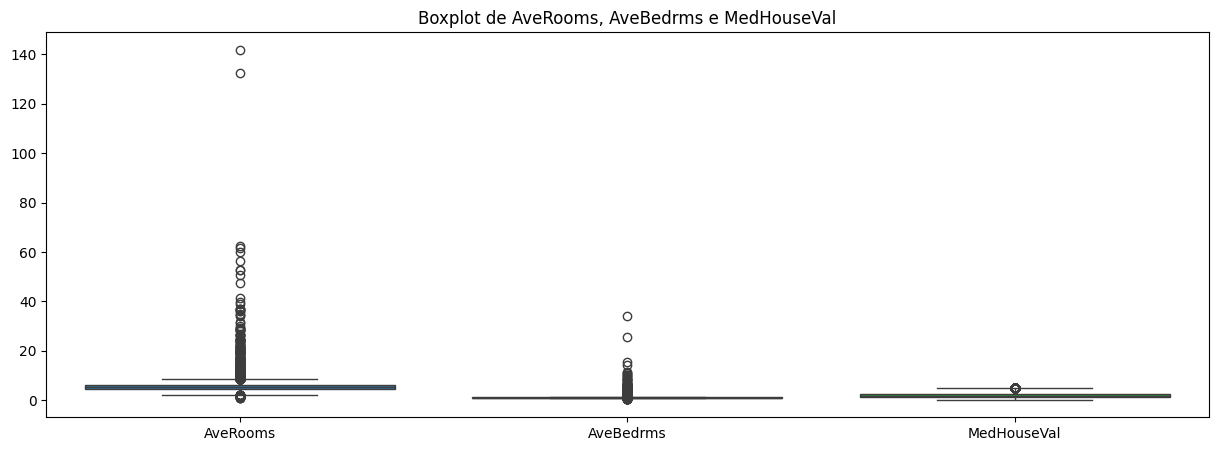

In [43]:
# Distribuição da variável alvo
sns.histplot(df['MedHouseVal'], kde=True)
plt.title('Distribuição da MedHouseVal')
plt.show()

# Boxplot para identificar outliers em algumas features
plt.figure(figsize=(15, 5))
sns.boxplot(data=df[['AveRooms', 'AveBedrms', 'MedHouseVal']])
plt.title('Boxplot de AveRooms, AveBedrms e MedHouseVal')
plt.show()

In [44]:
# Dado que a distribuição da variável alvo é assimétrica, aplica-se uma transformação logarítmica para reduzir a assimetria
df['MedHouseVal'] = np.log1p(df['MedHouseVal'])

In [45]:
# Remover outliers usando o método IQR
Q1 = df[['AveRooms', 'AveBedrms']].quantile(0.25)
Q3 = df[['AveRooms', 'AveBedrms']].quantile(0.75)
IQR = Q3 - Q1

# Filtrando os outliers
df_filtered = df[~((df[['AveRooms', 'AveBedrms']] < (Q1 - 1.5 * IQR)) | (df[['AveRooms', 'AveBedrms']] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [46]:
# Criando novas features baseadas nas variáveis existentes
df_filtered = df_filtered.assign(RoomsPerBedroom=df_filtered['AveRooms'] / df_filtered['AveBedrms'])


In [47]:
!pip install scikit-learn

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df_filtered[['AveRooms', 'AveBedrms', 'RoomsPerBedroom']]
y = df_filtered['MedHouseVal']

X_scaled = scaler.fit_transform(X)


In [49]:
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

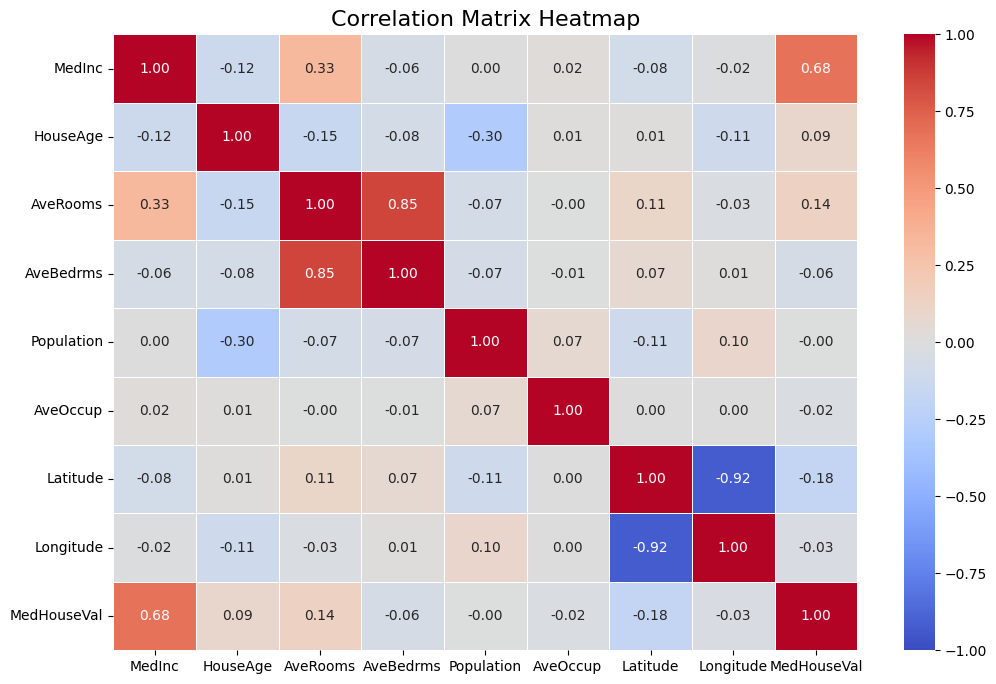

In [50]:
# As distribuições parecem melhores agora. Vamos exibir a nova matriz de correlação para análise.

correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin = -1)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

In [51]:
# Preparando as variáveis para treinar o modelo.
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Treinar com o ExtraTrees
#model = ExtraTreesRegressor(random_state=7, n_estimators=67, max_features='sqrt', max_depth=100, min_samples_split=13, min_samples_leaf=1, bootstrap = False)
#model = ExtraTreesRegressor(random_state=42, n_estimators=350, max_features='sqrt', max_depth=None, min_samples_split=2, min_samples_leaf=1)
model = ExtraTreesRegressor();
model.fit(X_train, y_train)

ExtraTreesRegressor()

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [56]:
# Fazer previsões
y_pred = model.predict(X_test)

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 0.09940338330274318
Mean Squared Error (MSE): 0.0206724190535779
Root Mean Squared Error (RMSE): 0.14377906333530588
R² Score: 0.8359909483550853


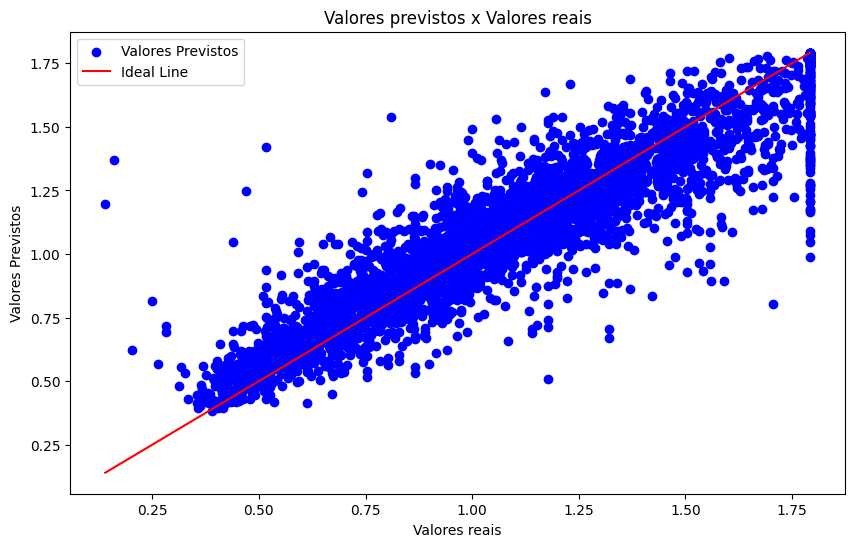

In [57]:
# Gráfico de valores previstos x valores atuais
plt.figure(figsize=(10, 6))
plt.scatter(x=y_test, y=y_pred, color='blue', label='Valores Previstos')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='-', label='Ideal Line')
plt.xlabel('Valores reais')
plt.ylabel('Valores Previstos')
plt.title('Valores previstos x Valores reais')
plt.legend()
plt.show()